# Integrated Decision Support System: The PARO Framework
### Part 2: Project Portfolio Prioritization & Selection

In this notebook, we transition from foundational modeling to prescriptive decision-making. The goal is to evaluate the full set of proposed projects for the 2026-2028 cycle and determine which initiatives should be prioritized to maximize strategic value.

We will focus on three core steps:

- **Presenting Proposed Projects**: Review all initiatives identified for the 2026-2028 portfolio.  
- **Minimum Project & Asset Data**: Explain some of the essential fields collected for some projects and associated assets, providing the baseline for informed evaluation.  
- **Project Prioritization Exercise**: Apply linear programming to optimize the portfolio under the $1,000,000 budget and finite operational capacities, ensuring that selected projects effectively mitigate strategic risk and generate tangible organizational impact.

This notebook bridges the strategic foundations established in Part 1 with actionable, resource-aware project selection.

**Author**: J-F Jutras

**Date**: January 2026

**Methodology**: Prescriptive Analytics | Operations Research | Decision Science

## 2.1-Data Loading

In [1]:
import pandas as pd
import numpy as np

#Settings
file_path = '/kaggle/input/portfoliosimulationdata/ProjectPortfolioOptimization.xlsx'

#Loading resource data
df_resources = pd.read_excel(file_path, sheet_name='Resources')
df_resources.columns = df_resources.columns.str.strip()
df_resources.fillna(0, inplace=True)

#Loading project demand
#Asset management projects
df_amp_2026 = pd.read_excel(file_path, sheet_name='AMP2026')
df_amp_2027 = pd.read_excel(file_path, sheet_name='AMP2027')
df_amp_2028 = pd.read_excel(file_path, sheet_name='AMP2028')

#Other projects
df_p_2026 = pd.read_excel(file_path, sheet_name='P2026')
df_p_2027 = pd.read_excel(file_path, sheet_name='P2027')
df_p_2028 = pd.read_excel(file_path, sheet_name='P2028')

#Loading financial and impacts
#Main project profiles (budgets, revenues, min/max for Monte-Carlo)
df_project_profiles = pd.read_excel(file_path, sheet_name='Projects')

#Specific details for asset management (newassetcosts, etc.)
df_asset_details = pd.read_excel(file_path, sheet_name='Asset Management Projects')

#Operational impacts
df_oper_impact = pd.read_excel(file_path, sheet_name='OperImpact')
df_new_oper_impact = pd.read_excel(file_path, sheet_name='NewOperImpact')
df_asset_oper_impact = pd.read_excel(file_path, sheet_name='AssetOperImpact')

#Filling missing values with 0 to ensure mathematical operations don't fail
dataframes = [
    df_amp_2026, df_amp_2027, df_amp_2028, 
    df_p_2026, df_p_2027, df_p_2028,
    df_project_profiles, df_asset_details,
    df_oper_impact, df_new_oper_impact, df_asset_oper_impact
]

for df in dataframes:
    df.fillna(0, inplace=True)

print("PARO framework: all 12 modules successfully loaded into memory.")

#Clone the public GitHub repository "jfj-utils" into the current Kaggle working directory.
#This downloads all files and folders from the repo so they can be used in the notebook.
!rm -rf /kaggle/working/jfj-utils
!git clone https://github.com/jfjutras07/jfj-utils.git

#Add the cloned repository to the Python path so Python can import modules from it
import sys
sys.path.append("/kaggle/working/jfj-utils")

PARO framework: all 12 modules successfully loaded into memory.
Cloning into 'jfj-utils'...
remote: Enumerating objects: 3454, done.
remote: Counting objects: 100% (228/228), done.
remote: Compressing objects: 100% (119/119), done.
remote: Total 3454 (delta 198), reused 109 (delta 109), pack-reused 3226 (from 4)
Receiving objects: 100% (3454/3454), 1.15 MiB | 7.40 MiB/s, done.
Resolving deltas: 100% (2275/2275), done.


## 2.2-Project Proposals (2026-2028)

**Asset Management Project Proposals**

For these projects, the evaluation measures how effectively it reduces asset-related strategic risk and preserves service continuity. Rather than seeking growth or direct ROI, the analysis focuses on the current health of the asset, its criticality for vulnerable activities, and the extent to which the proposed project improves that condition. By comparing the **AssetScore** (current state) to the **FinalAssetScore** (post-project state), we quantify the **AssetImpact**, i.e. the tangible reduction in exposure achieved through the intervention. 

This assessment is complemented by budget uncertainty, delivery and dependency risks, time sensitivity, and scalability considerations, ensuring that projects are prioritized based on their ability to reduce residual risk where asset failure would have the most significant organizational, clinical, or operational consequences.

| ProjectID | ProjectName                                      | ProjectDescription                                                                                                      |
|-----------|--------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------|
| 1         | Replacement of 8 TENS Units                     | Purchase of 8 new electrotherapy devices to replace aging units showing inconsistent current output.                    |
| 2         | Maintenance of 3 Corporate Vehicles             | Comprehensive mechanical overhaul and GPS tracker installation for 3 out of 6 vehicles in the fleet.                  |
| 3         | IT Hardware Refresh for 10 Clinicians           | Purchase of 10 new medical-grade tablets to replace units with failing batteries and cracked screens.                  |
| 4         | Office Furniture Ergonomic Retrofit             | Replacement of 5 old ergonomic chairs and 3 sit-stand desks for the Finance and Legal teams.                            |
| 5         | Administrative Laptop Fleet Refresh             | Replacement of 6 laptops for the Marketing department to ensure software compatibility.                                |
| 6         | Kitchen and Common Area Refurbishment           | Replacement of 2 shared refrigerators and 2 microwaves units in the staff cafeteria.                                   |
| 7         | Facility Lighting Transition to LED             | Systematic replacement of all legacy fluorescent lighting in the administrative wing to improve energy efficiency and long-term maintenance costs. |
| 8         | Next-Gen Edge Security & Network Resiliency     | Strategic lifecycle replacement of the core firewall infrastructure to ensure hardware support and maintain enterprise-grade defense against emerging cyber threats. |
| 9         | Enterprise Wireless Infrastructure Modernization | Systematic migration to Wi-Fi 6 technology to optimize network capacity and ensure reliable connectivity for the clinical mobile tablet fleet. |
| 10        | Main Facility Physical & Digital Access Overhaul | Full replacement of the aging magnetic badge system with encrypted smart-readers for the main clinic.                  |


**Service Development Project Proposals**

For the other project types (Service Development, Growth, and Service Improvement), no asset health score is assessed, as these projects typically involve new assets or capabilities, making such a measure irrelevant. 

Again, the evaluation focuses on budgetary considerations and the complexity of execution, but also on the extent to which each project reduces the organization’s initial RiskScore. Particular attention is also given to the introduction of new assets, the creation of new roles, or additional demands placed on existing staff. Project interdependencies are explicitly captured as well, recognizing that certain initiatives may require the prior completion of others (for example, acquiring critical assets before launching a dependent service). 

Together, these dimensions provide the essential inputs for the portfolio optimization exercise, ensuring that project selection reflects both strategic impact and real-world execution constraints.

| ProjectID | ProjectName                          | ProjectDescription                                                                                                  |
|-----------|--------------------------------------|----------------------------------------------------------------------------------------------------------------------|
| 11        | Pediatric OT Sensory Integration Track | Setup of a specialized sensory corner with weighted tools and swings to expand the Occupational Therapy offer for children. |
| 13        | Fall Prevention Program for Seniors  | Design of exercise protocols and acquisition of 4 portable gait-analysis sensors for geriatric care.               |
| 23        | 24/7 Virtual Triage Chatbot           | Deployment of an AI-driven tool on the website to capture and qualify leads outside of regular business hours.       |
| 24        | Inventory QR-Code Tracking System    | Implementation of a scanning system for clinical supplies to reduce waste and automate re-ordering processes.       |
| 25        | Law 25 Breach Reporting App           | Internal development of a dedicated application to log, track, and report data privacy breaches in compliance with Law 25. |
| 40        | HVAC Monitoring & Energy Audit        | Installation of smart sensors on the building’s climate control system, followed by a revised Energy Conservation Policy to reduce operational overhead. |


**Growth Development Project Proposals**

| ProjectID | Project Name                          | Project Description                                                                                                   |
|-----------|---------------------------------------|-----------------------------------------------------------------------------------------------------------------------|
| 12        | Telehealth Hybrid Care Implementation | Technical setup of secure video platforms and training for 5 clinicians to offer remote follow-ups for rural patients. |
| 14        | Running Injury Clinic Launch          | Integration of a high-speed camera system and treadmill for professional running gait analysis and biomechanical coaching. |
| 15        | Chronic Pain Mindfulness Program      | Creation of a hybrid service (in-person + app-based) for stress and pain management using the tablet fleet.           |
| 18        | Post-Concussion Rehab Program         | Creation of clinical protocols and purchase of 2 specialized balance boards to offer a dedicated service for head injuries. |
| 19        | Corporate Ergonomic Assessment Service | Development of a standardized mobile kit and reporting template to sell on-site workplace audits to local businesses. |
| 20        | B2B Industrial Health Partnership     | Formal agreement with local factories to provide priority injury assessment for their workers, creating a steady stream of high-volume referrals. |
| 21        | Annual Prevention Check-up Subscription | Launch of a recurring revenue model where private clients pay a yearly fee for quarterly physical “maintenance” and performance tracking. |
| 22        | Integrated Orthopedic Referral Bridge | Implementation of a direct digital referral link with 3 local private medical clinics to capture patients the moment they leave their doctor’s office. |


**Service Improvement Project Proposals**

| ProjectID | Project Name                          | Project Description                                                                                                      |
|-----------|---------------------------------------|--------------------------------------------------------------------------------------------------------------------------|
| 16        | Internal Clinical Mentorship Program  | Collaboration between HR and Senior Clinicians to create a structured peer-review and coaching path for junior staff.   |
| 17        | Employee Flexible Scheduling Portal   | Joint project between IT and Operations to implement a self-service module for staff to manage shift swaps and time-off requests. |
| 26        | Contract Management Optimization      | Redesign of the legal contract lifecycle, from drafting to digital signature, to reduce processing time and legal exposure. |
| 27        | Pricing Strategy & Benchmarking       | Comprehensive analysis of internal pricing models compared to market standards to optimize revenue and competitiveness. |
| 28        | Predictive Employee Turnover Model    | Development and implementation of a data-driven model to identify flight risks and proactive retention strategies.      |
| 29        | Recruitment Process Overhaul          | Revision of the staffing workflow, from job posting to onboarding, to reduce time-to-hire and improve candidate quality. |
| 30        | Corporate Digital & Graphic Standards | Creation of a unified brand book and digital guidelines to ensure visual consistency across all clinic locations and platforms. |
| 31        | Integrated Asset Management Plans     | Drafting of lifecycle management plans for all physical and digital assets to optimize long-term CAPEX planning.        |
| 32        | Project Management Toolkit & Training | Implementation of a standardized PMO toolkit and staff training to ensure uniform project delivery across departments.  |
| 33        | Enterprise Risk Management Training   | Deployment of an integrated risk management training to identify, assess, and mitigate strategic and operational threats. |
| 34        | Incident Reporting & Handling Lean    | Optimization of the workflow for reporting and treating clinical and operational incidents to ensure faster resolution. |
| 35        | IT Support Ticket Workflow Optimization | Refinement of the IT service desk processes to improve response times and prioritize critical infrastructure issues. |
| 36        | AI Benchmarking & Org Diagnostic      | Strategic analysis of AI adoption in the rehab industry and internal diagnostic to identify automation opportunities.    |
| 37        | Supply Chain & Logistics Optimization | Streamlining of the receiving and shipping processes for clinical supplies to reduce errors and inventory lag.          |
| 38        | Hygiene & Sanitation Route Revision   | Review and optimization of facility cleaning schedules and routes to ensure maximum safety and compliance efficiency.   |
| 39        | Cybersecurity Incident Response Plan  | Technical vulnerability assessment leading to the implementation of a formal Cybersecurity Playbook for the IT and Legal teams. |


## 2.3-Portfolio Demand and Capacity Snapshot

Every analyst has heard this message countless times: “We must prioritize, resources are limited.”
Yet, in practice, organizations often behave as if budgets are infinite and capacity elastic.

This section introduces a deliberately uncomfortable snapshot of project demand versus real operational capacity—before any prioritization logic is applied. Its purpose is simple: expose the structural gap between what the organization wants to do and what it can actually deliver, setting the conditions for a disciplined and defensible optimization exercise.

**Current Capacity**

In [2]:
#Create the Department reference mapping
dept_mapping = {
    1: "Finance and Legal",
    2: "Human Resources",
    3: "Marketing and Communications",
    4: "Executive Leadership and Performance",
    5: "IT",
    6: "Clinical Operations",
    7: "Supply Chain and Field Logistics",
    8: "Facilities & Asset Management"
}

#Apply the mapping to df_resources
df_resources['DepartmentName'] = df_resources['DepartmentID'].map(dept_mapping)

#Reorder columns to place DepartmentName next to DepartmentID for clarity
cols = list(df_resources.columns)
dept_name_idx = cols.pop(cols.index('DepartmentName'))
cols.insert(cols.index('DepartmentID') + 1, dept_name_idx)
df_resources = df_resources[cols]

print("Department metadata successfully integrated into Organizational Digital Twin.")

Department metadata successfully integrated into Organizational Digital Twin.


In [3]:
#Grouping by DepartmentName and calculating the mean for each year
capacity_columns = ['%Capacity2026', '%Capacity2027', '%Capacity2028']

#We perform the aggregation
dept_capacity_trends = df_resources.groupby('DepartmentName')[capacity_columns].mean().reset_index()

#Rounding for better readability (2 decimals)
dept_capacity_trends[capacity_columns] = dept_capacity_trends[capacity_columns].round(2)

#Displaying the resulting table
print("Average Operational Capacity per Department (2026-2028):")
print(dept_capacity_trends.sort_values(by='%Capacity2026', ascending=False))

Average Operational Capacity per Department (2026-2028):
                         DepartmentName  %Capacity2026  %Capacity2027  \
1  Executive Leadership and Performance           0.88           0.87   
2         Facilities & Asset Management           0.86           0.81   
3                     Finance and Legal           0.86           0.83   
0                   Clinical Operations           0.85           0.84   
5                                    IT           0.84           0.81   
6          Marketing and Communications           0.83           0.79   
7      Supply Chain and Field Logistics           0.80           0.80   
4                       Human Resources           0.77           0.76   

   %Capacity2028  
1           0.85  
2           0.80  
3           0.80  
0           0.84  
5           0.79  
6           0.75  
7           0.78  
4           0.75  


The results confirm the relevance of this assumption: even with this conservative baseline, most departments reach 80–88% utilization, which is considered an optimal control zone rather than excess capacity. This approach avoids the common pitfall of over-commitment and ensures that prioritization decisions remain realistic, sustainable, and execution-focused over the 2026–2028 horizon, especially given the continuation of projects from previous planning cycles.

This is why strict departmental prioritization is essential. Even with an 80% best-practice operational baseline, departments such as Executive Leadership, Finance & Legal, Clinical Operations, Facilities, and IT consistently operate near or over capacity. To ensure execution actually works, not all projects can be taken on. Each department must make clear trade-offs and limit initiatives in flight, otherwise the portfolio will exceed real absorption capacity and create delivery risk rather than value.

In [4]:
#Convert all capacity columns to numeric values (removing the % sign)
years = ['2026', '2027', '2028']

for year in years:
    col_name = f'%Capacity{year}'
    # We force conversion to string, strip '%', then to float
    df_resources[col_name] = (
        df_resources[col_name]
        .astype(str)
        .str.replace('%', '')
        .astype(float)
    )

critical_roles_2026 = df_resources[df_resources['%Capacity2026'] >= 0.9][['DepartmentName', 'JobTitle', '%Capacity2026']]

print("Critical Roles - 2026 Capacity >= 90%:")
display(critical_roles_2026.sort_values(by='%Capacity2026', ascending=False))

Critical Roles - 2026 Capacity >= 90%:


,DepartmentName,JobTitle,%Capacity2026
17,Executive Leadership and Performance,AssociateClinicalDirector,0.954167
35,Facilities & Asset Management,AssetManagementTechnician,0.913932
11,Marketing and Communications,MarketingSpecialist,0.913932
25,Clinical Operations,Physiotherapist,0.904340
15,Executive Leadership and Performance,PerformanceAdvisor,0.903711
26,Clinical Operations,OccupationalTherapist,0.903005
28,Clinical Operations,Chiropractor,0.902504
29,Clinical Operations,RehabilitationTechnician,0.902483


These results highlight specific critical roles already operating at or above 90% capacity in 2026, particularly within Clinical Operations, Executive Leadership, Facilities & Asset Management, and Marketing.

**Project Demand on Operational Capacity**

At the organizational level, the available execution capacity amounts to **5,226** hours in 2026, **6,505** hours in 2027, and **7,878** hours in 2028, assuming a prudent utilization cap of 90%. Against this backdrop, the portfolio generates a total demand of **14,918** hours, but its distribution reveals a significant structural challenge: while 2026 (**3,989** hours) and 2028 (**2,240** hours) appear manageable, the year 2027 faces a massive surge with **8,689** hours demanded.

This 2027 peak represents a 33% deficit in capacity (8,689h demanded vs. 6,505h available), creating an immediate execution bottleneck. Even in years where the aggregate balance seems feasible, the data conceals a deeper constraint: several key job titles are already operating at or above 90% operational load before project work begins.

Consequently, execution risk is driven by two factors: the untenable volume of work in 2027 and the specific roles on whom those hours are concentrated. This makes strict prioritization, cross-year task leveling, and intelligent decomposition of initiatives essential to transform theoretical project lists into a realistic, executable roadmap.

**Portfolio Budget Pressure**

This distribution is fully aligned with the company’s mission, which is primarily project-driven rather than asset-centric. When integrating the granular costs from the consolidated master files, the Total Material Budget is established at **528,500** dollars and the Total Human Budget reaches **2,697,509** $.

Consequently, the Total Required Budget for the portfolio reaches **3,226,009** $. Given the current **1,000,000** dollars threshold, the financial exposure is more than triple the available funding. This significant gap confirms that the organization cannot absorb all proposed initiatives simultaneously. It reinforces the necessity of a disciplined, data-driven prioritization exercise to identify which projects offer the highest strategic return on investment while remaining within the strict 1M financial boundary.

**Structural and Operational Impacts of Proposed Projects**

Beyond their immediate budget and delivery requirements, proposed projects introduce structural and long-term impacts that materially affect the organization. Some initiatives result in new or upgraded assets, others create new roles or recurring staffing needs, while several increase the ongoing operational load once completed. These effects are explicitly captured and assessed at the initial evaluation stage, as they directly influence future capacity, cost structure, and execution risk. 

In addition, the prioritization process integrates risk-related dimensions, enabling the construction of multiple optimal portfolio scenarios aligned with different organizational priorities, risk appetites, and strategic trade-offs. This ensures that portfolio decisions remain robust, adaptable, and grounded in real-world operational consequences.

## 2.4-From Portfolio Modeling to Capacity-Constrained Optimization

In [5]:
#Data Loading
file_path = '/kaggle/input/mastertableportfolio/MasterTable.xlsx'

#Projects and Capacity
df_mastercapacity = pd.read_excel(file_path, sheet_name='MasterTableCapacity')
df_masterproject = pd.read_excel(file_path, sheet_name='MasterTableProject')
df_masterresources = pd.read_excel(file_path, sheet_name='MasterTableResources')

**Data Cleaning**

In [6]:
#Clean whitespace from all column names in all dataframes
df_mastercapacity.columns = df_mastercapacity.columns.str.strip()
df_masterproject.columns = df_masterproject.columns.str.strip()
df_masterresources.columns = df_masterresources.columns.str.strip()

#Clean whitespace from the values inside the JobTitle column
df_masterresources['JobTitle'] = df_masterresources['JobTitle'].str.strip()

print("Columns cleaned. Ready for Scenarios.")

Columns cleaned. Ready for Scenarios.


In [7]:
df_mastercapacity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 42 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ProjectID                              120 non-null    int64  
 1   ProjectType                            120 non-null    int64  
 2   ProjectName                            120 non-null    object 
 3   Year                                   120 non-null    int64  
 4   LegalCounsel                           19 non-null     float64
 5   Paralegal                              5 non-null      float64
 6   FinancialController                    18 non-null     float64
 7   AccountsReceivableSpecialist           5 non-null      float64
 8   PayrollBenefitsOfficer                 5 non-null      float64
 9   AccountingClerk                        7 non-null      float64
 10  HRGeneralist                           12 non-null     float64
 11  Talent

In [8]:
df_masterproject.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ProjectID            40 non-null     int64  
 1   ProjectType          40 non-null     int64  
 2   ProjectName          40 non-null     object 
 3   AssetImpact          40 non-null     int64  
 4   LegalImpact          40 non-null     int64  
 5   FinancialImpact      40 non-null     int64  
 6   InternalImpact       40 non-null     int64  
 7   AdaptationImpact     40 non-null     int64  
 8   MatBudgetLikely      40 non-null     int64  
 9   HumBudgetLikely      40 non-null     int64  
 10  RevenuesLikely       40 non-null     int64  
 11  TotalNewAssetsCost   40 non-null     int64  
 12  TotalNewOpsCost      40 non-null     int64  
 13  TotalNewJobsCost     40 non-null     int64  
 14  ExecutionRisk        40 non-null     int64  
 15  TimeSensitivityRisk  40 non-null     int64

In [9]:
df_masterresources.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   JobTitleID    38 non-null     int64  
 1   DepartmentID  38 non-null     int64  
 2   JobTitle      38 non-null     object 
 3   Capacity2026  38 non-null     float64
 4   Capacity2027  38 non-null     float64
 5   Capacity2028  38 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 1.9+ KB


In [10]:
#Identify resource columns (from index 4 to the end)
resource_cols = df_mastercapacity.columns[4:]

#Replace all NaN values with 0
df_mastercapacity[resource_cols] = df_mastercapacity[resource_cols].fillna(0)
df_masterproject['PrerequisiteID'] = df_masterproject['PrerequisiteID'].fillna(0)

print("Null values handled. Data is now ready for the solver.")

Null values handled. Data is now ready for the solver.


**Portfolio Optimization - Establishing a Baseline**

To evaluate the portfolio’s alignment with organizational priorities, we implement a Strategic Bucketing approach. This method ensures that projects compete for funding within their designated categories, preventing high-revenue initiatives from cannibalizing essential infrastructure or internal optimization projects.

For our Baseline Scenario, we have defined the following strategic investment targets, while allowing for a ±5% flexibility margin per category. This tolerance ensures the optimizer is not restricted by rigid mathematical boundaries, allowing it to capture high-value projects that might slightly exceed a strict quota while still maintaining the overall strategic balance:

**Asset Management (10% ± 5%)**: A lean allocation focused on critical maintenance and urgent replacements.

**Service Development (10% ± 5%)**: Dedicated to expanding our clinical offering and service reach.

**Growth & Expansion (40% ± 5%)**: Targeted at high-ROI initiatives and market penetration.

**Continuous Improvement (40% ± 5%)**: A strong emphasis on operational excellence and internal efficiency.

This distribution is integrated with our previously defined operational constraints, including a 90% Resource Capacity limit, risk thresholds, and project prerequisites. Furthermore, this baseline incorporates a comprehensive financial and strategic evaluation for every project, ensuring that each selection is backed by detailed ROI metrics and alignment scores. This serves as a more realistic and agile starting point, enabling the model to maximize budget utilization without compromising the long-term strategic mix.

In [11]:
!pip install pulp -q
from sklearn.preprocessing import RobustScaler
import pulp
import numpy as np
import pandas as pd

def solve_paro_baseline_flexible(df_project, df_capacity, df_resources, total_budget=1000000):
    # Data Preparation
    df_scaled = df_project.copy()
    
    # Calculate raw ROI
    df_scaled['ROIRaw'] = df_scaled.apply(
        lambda row: (row['RevenuesLikely'] - (row['TotalNewOpsCost'] + row['TotalNewJobsCost'])) / 
        (row['MatBudgetLikely'] + row['HumBudgetLikely']) if (row['MatBudgetLikely'] + row['HumBudgetLikely']) > 0 else 0, 
        axis=1
    )
    
    # Define strategic weights
    w_legal, w_roi, risk_penalty = 1.2, 1.1, 0.05
    
    # Initialize RobustScaler to handle financial outliers
    scaler = RobustScaler()
    
    # Apply robust scaling to impacts and ROI
    impact_cols = ['AssetImpact', 'LegalImpact', 'InternalImpact', 'AdaptationImpact', 'FinancialImpact']
    df_scaled[impact_cols + ['ROIRaw']] = scaler.fit_transform(df_scaled[impact_cols + ['ROIRaw']])

    # Setup Optimization Problem
    prob = pulp.LpProblem("PARO_Robust_Optimization", pulp.LpMaximize)
    project_ids = df_scaled['ProjectID'].tolist()
    x = pulp.LpVariable.dicts("Select", project_ids, cat='Binary')
    
    # Strategic Buckets Allocation (%)
    allocations = {1: 0.1, 2: 0.1, 3: 0.4, 4: 0.4}
    tolerance = 0.05 
    
    # Objective Function: Robust Normalized Impact + ROI - Risk Malus
    objective_scores = {}
    for _, row in df_scaled.iterrows():
        p_id = row['ProjectID']
        
        # Weighted Strategic Score
        if row['ProjectType'] == 1:
            strat_score = row['AssetImpact'] + (row['LegalImpact'] * w_legal)
        else:
            strat_score = row['InternalImpact'] + row['AdaptationImpact'] + row['FinancialImpact']
        
        # Risk Malus calculation
        total_risk = row['ExecutionRisk'] + row['ScalabilityRisk'] + \
                     row['TimeSensitivityRisk'] + row['DependencyRisk']
        
        objective_scores[p_id] = strat_score + (row['ROIRaw'] * w_roi) - (total_risk * risk_penalty)

    prob += pulp.lpSum([x[i] * objective_scores[i] for i in project_ids])

    # Constraints: Strategic Budget Buckets
    for p_type, pct in allocations.items():
        type_min = total_budget * (pct - tolerance)
        type_max = total_budget * (pct + tolerance)
        type_projects = df_scaled[df_scaled['ProjectType'] == p_type]['ProjectID'].tolist()
        
        if type_projects:
            bucket_cost = pulp.lpSum([x[i] * (df_scaled.loc[df_scaled['ProjectID'] == i, 'MatBudgetLikely'].iloc[0] + 
                                               df_scaled.loc[df_scaled['ProjectID'] == i, 'HumBudgetLikely'].iloc[0]) 
                                     for i in type_projects])
            prob += bucket_cost <= type_max, f"Max_Budget_Type_{p_type}"
            if type_min > 0:
                prob += bucket_cost >= type_min, f"Min_Budget_Type_{p_type}"

    # Constraints: Human Resource Capacity (90% limit)
    years = ['2026', '2027', '2028']
    cap_col_map = {col.replace(' ', '').lower(): col for col in df_capacity.columns if col not in ['ProjectID', 'Year']}
    
    for year in years:
        for idx, res_row in df_resources.iterrows():
            job_title = str(res_row['JobTitle']).replace(' ', '').lower()
            if job_title in cap_col_map:
                actual_col = cap_col_map[job_title]
                capacity = res_row[f'Capacity{year}'] * 0.90
                demand = pulp.lpSum([x[p_id] * df_capacity.loc[(df_capacity['ProjectID'] == p_id) & 
                                    (df_capacity['Year'] == int(year)), actual_col].sum() 
                                    for p_id in project_ids])
                prob += demand <= capacity, f"Cap_{year}_{job_title[:8]}_{idx}"

    # Constraints: Safety and Prerequisites
    for _, row in df_project.iterrows():
        p_id = row['ProjectID']
        if row['AssetImpact'] > 50:
            prob += x[p_id] == 1
        if (row['ExecutionRisk'] + row['ScalabilityRisk'] + row['TimeSensitivityRisk'] + row['DependencyRisk']) > 12:
            prob += x[p_id] == 0
        if row['PrerequisiteID'] != 0 and not pd.isna(row['PrerequisiteID']):
            pre_id = int(row['PrerequisiteID'])
            prob += x[p_id] <= x[pre_id]

    # Solve
    prob.solve(pulp.PULP_CBC_CMD(msg=0))
    selected = [i for i in project_ids if pulp.value(x[i]) == 1]
    
    return df_project[df_project['ProjectID'].isin(selected)].copy()

# Execute
df_baseline_flex = solve_paro_baseline_flexible(df_masterproject, df_mastercapacity, df_masterresources)

print(f"Total Projects Selected: {len(df_baseline_flex)}")
print(df_baseline_flex.groupby('ProjectType').size().rename("Project Count"))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 81.1 MB/s eta 0:00:00
Total Projects Selected: 18
ProjectType
1     4
2     2
3     1
4    11
Name: Project Count, dtype: int64


The optimized portfolio selects 18 projects, reflecting a strategic posture that strictly adheres to a 90% resource capacity limit while incorporating a ±5% flexibility margin across buckets. This distribution was anticipated given the advanced state of organizational saturation and the high structural costs associated with expansion.

While Asset (Type 1) projects are secured through mandatory strategic locks and Improvement (Type 4) projects dominate due to their high efficiency-to-resource ratio, Growth (Type 3) initiatives are minimal. This indicates that expansion and development projects likely exceed the safety-buffered capacity of key personnel or carry a prohibitive cost in terms of long-term material assets and new resource requirements.

Consequently, the portfolio is designed for high resilience, maintaining a 10% operational buffer to mitigate burnout and execution risk. It prioritizes internal optimization and legal compliance, acknowledging that under current constraints, the substantial investment in new resources and long-term assets required for market expansion remains secondary to maintaining a stable and compliant operational core.

In [12]:
# Portfolio Summary

# Financial & Global Metrics
selected_ids = df_baseline_flex['ProjectID'].unique()
total_inv = df_baseline_flex['MatBudgetLikely'].sum() + df_baseline_flex['HumBudgetLikely'].sum()
roi_avg = ((df_baseline_flex['RevenuesLikely'] - (df_baseline_flex['TotalNewOpsCost'] + df_baseline_flex['TotalNewJobsCost'])) / 
           (df_baseline_flex['MatBudgetLikely'] + df_baseline_flex['HumBudgetLikely'])).mean()

# Strategic Breakdown
type_stats = df_baseline_flex.groupby('ProjectType').agg(
    Count=('ProjectID', 'count'),
    Cost_Mat=('MatBudgetLikely', 'sum'),
    Cost_Hum=('HumBudgetLikely', 'sum')
)
type_stats['Total_Cost'] = type_stats['Cost_Mat'] + type_stats['Cost_Hum']
type_stats['Budget_Share'] = (type_stats['Total_Cost'] / 1000000) * 100

# Mapping targets for visual comparison
targets = {1: "10% (+/-5)", 2: "30% (+/-5)", 3: "30% (+/-5)", 4: "30% (+/-5)"}
type_stats['Target_Range'] = type_stats.index.map(targets)

# Clean Dashboard Display
print(f"{' PORTFOLIO BASELINE ':=^55}")
print(f"Projects Selected : {len(df_baseline_flex)} / {len(df_masterproject)}")
print(f"Total Investment  : {total_inv:,.0f} $ (Util.: {total_inv/10000:.1f}%)")
print(f"Portfolio Avg ROI : {roi_avg:.2f}x")
print("-" * 55)

# Formatting the summary table for output
output_table = type_stats[['Count', 'Total_Cost', 'Budget_Share', 'Target_Range']].copy()
print(output_table.to_string(
    formatters={'Total_Cost': '{:,.0f} $'.format, 'Budget_Share': '{:.1f}%'.format}
))
print("-" * 55)

# 4. List of selected Project IDs
print(f"Selected IDs: {df_baseline_flex['ProjectID'].tolist()}")

================= PORTFOLIO BASELINE ==================
Projects Selected : 18 / 40
Total Investment  : 896,754 $ (Util.: 89.7%)
Portfolio Avg ROI : 0.65x
-------------------------------------------------------
             Count Total_Cost Budget_Share Target_Range
ProjectType                                            
1                4   64,639 $         6.5%   10% (+/-5)
2                2   61,605 $         6.2%   30% (+/-5)
3                1  398,355 $        39.8%   30% (+/-5)
4               11  372,155 $        37.2%   30% (+/-5)
-------------------------------------------------------
Selected IDs: [1, 2, 3, 6, 17, 19, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 38, 40]


The optimized portfolio selects 18 out of 40 potential projects, representing a total investment of 896,754$ (89.7% budget utilization). This configuration maintains a conservative budget posture while ensuring operational stability, using a strict 90% human-capacity cap to control execution risk and organizational fatigue.

- **Total Investment**: 896,754$ (High budget utilization within prudent operational limits).

- **Portfolio ROI**: 0.65x average, reflecting a balanced mix of strategic initiatives and financial returns.

- **Capacity Strategy**: Hard 90% utilization ceiling across all job families, ensuring delivery feasibility while maintaining resilience.

The use of soft budget buckets allowed the optimizer to prioritize high-value initiatives while remaining broadly aligned with the intended strategic mix:

- **Asset Management** (Type 1): 4 projects representing 6.5% of total spend. Slightly below the 10% target but within the 5–15% tolerance, securing critical infrastructure, IT resilience, and compliance-related assets.

- **Service Development** (Type 2): 2 projects at 6.2% share, reflecting a selective focus on service initiatives under current capacity constraints.

- **Growth & Expansion** (Type 3): 1 project accounting for 39.8% of total investment. The model concentrates growth exposure into a single, capital-intensive initiative, reflecting the high resource commitment required by expansion projects.

- **Continuous Improvement** (Type 4): 11 projects at 37.2% share. Overrepresentation driven by high strategic alignment, lower execution risk, and favorable efficiency ratios, making these initiatives dominant under constrained capacity conditions.

**Strategic Posture**: This baseline confirms a “Stability-First with Selective Growth” posture. The portfolio reinforces the organizational backbone (Types 1 & 4), deliberately limits service proliferation (Type 2), and accepts growth (Type 3) in a highly concentrated and controlled form.

**Portfolio Optimization - Increasing Capacity**

While the Baseline Scenario demonstrates a high degree of operational resilience, it also suggests a potential "opportunity ceiling" that may be influenced by resource saturation. With 22 projects left on the sidelines and Growth (Type 3) initiatives relatively restricted, it is plausible that the current 90% capacity cap could act as a primary bottleneck for organizational expansion.

To explore the possible impact of accelerated growth, this next section simulates a 10% Capacity Increase across all key job titles. This simulation is intended to test the hypothesis that additional human capital might unlock high-impact projects that were previously excluded, not due to lack of funding but potentially due to the high "resource cost" of scaling complex operations. By easing these labor constraints, we aim to assess whether a targeted hiring plan could improve strategic value and ROI.

In [13]:
# Function to simulate hiring / capacity increase (+10%)
def solve_with_hiring_boost(df_project, df_capacity, df_resources, boost_factor=1.10):
    # Create a copy and boost capacity for all resources (+10%)
    df_res_boosted = df_resources.copy()
    
    for year in [2026, 2027, 2028]:
        df_res_boosted[f'Capacity{year}'] *= boost_factor
    
    # Solve using the flexible baseline function (keeps +/-5% logic & 90% cap)
    return solve_paro_baseline_flexible(df_project, df_capacity, df_res_boosted)


# Simulating the +10% staff increase
df_boosted = solve_with_hiring_boost(
    df_masterproject,
    df_mastercapacity,
    df_masterresources,
    boost_factor=1.10
)

# Comparative Summary
print(f"{' CAPACITY BOOST SCENARIO (+10%) ':=^55}")
print(f"Original Portfolio (90% Cap) : {len(df_baseline_flex)} projects")
print(f"Boosted Portfolio (+10% Staff): {len(df_boosted)} projects")
print("-" * 55)

# Breakdown of the new boosted portfolio
boost_summary = df_boosted.groupby('ProjectType').size().rename("New Count")
print("Strategic distribution with more staff:")
print(boost_summary.to_frame().T)
print("-" * 55)

# Financial sanity check
total_inv_boost = df_boosted['MatBudgetLikely'].sum() + df_boosted['HumBudgetLikely'].sum()
print(f"Total Investment Required: {total_inv_boost:,.0f} $")

=========== CAPACITY BOOST SCENARIO (+10%) ============
Original Portfolio (90% Cap) : 18 projects
Boosted Portfolio (+10% Staff): 19 projects
-------------------------------------------------------
Strategic distribution with more staff:
ProjectType  1  2  3   4
New Count    5  3  1  10
-------------------------------------------------------
Total Investment Required: 1,054,369 $


The 10% increase in available human resources appears to marginally expand the feasible solution space, potentially allowing one additional project to be selected. The new strategic distribution shifts from 4, 2, 1, 11 to 5, 3, 1, 10, but the overall mix seems largely unchanged, suggesting that staffing may not be the primary limiting factor.

**Portfolio Optimization - Project Phasing**

Given that our 2027 forecast appears significantly backloaded, we hypothesize that the primary bottleneck is not a lack of total capacity, but rather a temporal misalignment in resource demand. Instead of pursuing costly and potentially redundant hiring, we will test whether strategic phasing (reallocating project start dates across the 2026–2028 timeline) can resolve these overlaps. 

By leveraging dynamic scheduling to shift workloads into underutilized windows, we aim to maximize the productivity of our existing workforce and capture higher strategic value without increasing fixed payroll costs.

In [14]:
# Function definition
def solve_dynamic_phasing(df_project, df_capacity, df_resources, total_budget=1000000, W_ROI=0.3, W_STRAT=1.0):
    prob = pulp.LpProblem("PARO_Dynamic_Phasing", pulp.LpMaximize)
    project_ids = df_project['ProjectID'].tolist()
    years = [2026, 2027, 2028]
    
    # Decision Variable: x[i, y] = 1 if project i starts in year y
    x = pulp.LpVariable.dicts("Start", (project_ids, years), cat='Binary')
    
    # Data lookup optimization
    proj_dict = df_project.set_index('ProjectID').to_dict('index')
    
    # ROI normalization for global budget weighting
    roi_values = []
    for _, row in df_project.iterrows():
        net_ben = row['RevenuesLikely'] - (row['TotalNewOpsCost'] + row['TotalNewJobsCost'])
        cost = row['MatBudgetLikely'] + row['HumBudgetLikely']
        roi_values.append(net_ben / cost if cost > 0 else 0)
    roi_scaled = RobustScaler().fit_transform(np.array(roi_values).reshape(-1, 1)).flatten()
    roi_map = dict(zip(df_project['ProjectID'], roi_scaled))
    
    # Objective: ROI + Strategic Impact with 2% annual delay penalty
    def get_score(p_id):
        row = proj_dict[p_id]
        strat = (row['AssetImpact'] + row['LegalImpact'] if row['ProjectType'] == 1 
                 else row['InternalImpact'] + row['AdaptationImpact'] + row['FinancialImpact'])
        return W_STRAT * strat + W_ROI * roi_map[p_id]

    prob += pulp.lpSum([x[i][y] * get_score(i) * (0.98**(y-2026)) for i in project_ids for y in years])

    for i in project_ids:
        # Constraint: A project starts once or not at all
        prob += pulp.lpSum([x[i][y] for y in years]) <= 1
        
        # Mandatory locks and risk exclusions
        row = proj_dict[i]
        if row['AssetImpact'] > 50: 
            prob += pulp.lpSum([x[i][y] for y in years]) == 1
        if (row['ExecutionRisk'] + row['ScalabilityRisk'] + row['TimeSensitivityRisk'] + row['DependencyRisk']) > 8:
            for y in years: prob += x[i][y] == 0

    # Flexible Strategic Buckets (±5% tolerance)
    allocations = {1: 0.10, 2: 0.10, 3: 0.40, 4: 0.40}
    for p_type, pct in allocations.items():
        type_ids = [i for i in project_ids if proj_dict[i]['ProjectType'] == p_type]
        if type_ids:
            cost_expr = pulp.lpSum([x[i][y] * (proj_dict[i]['MatBudgetLikely'] + proj_dict[i]['HumBudgetLikely']) 
                                    for i in type_ids for y in years])
            prob += cost_expr <= total_budget * (pct + 0.05)
            prob += cost_expr >= total_budget * (pct - 0.05)

    # Resource Capacity (90% limit per year)
    cap_col_map = {col.replace(' ', '').lower(): col for col in df_capacity.columns if col not in ['ProjectID', 'Year']}
    for y in years:
        df_cap_y = df_capacity[df_capacity['Year'] == y].set_index('ProjectID')
        for idx, res_row in df_resources.iterrows():
            job_title = str(res_row['JobTitle']).replace(' ', '').lower()
            if job_title in cap_col_map:
                col = cap_col_map[job_title]
                capacity = res_row[f'Capacity{y}'] * 0.90
                demand = pulp.lpSum([x[i][y] * df_cap_y.at[i, col] for i in project_ids if i in df_cap_y.index])
                prob += demand <= capacity

    prob.solve(pulp.PULP_CBC_CMD(msg=0))
    
    # Process results
    selected = [{'ProjectID': i, 'StartYear': y} for i in project_ids for y in years if pulp.value(x[i][y]) == 1]
    return pd.merge(pd.DataFrame(selected), df_project, on='ProjectID')

# Execute the phasing scenario
df_phased = solve_dynamic_phasing(df_masterproject, df_mastercapacity, df_masterresources, total_budget=1000000, W_ROI=0.3, W_STRAT=1.0)

# Global Metrics
total_inv_phased = df_phased['MatBudgetLikely'].sum() + df_phased['HumBudgetLikely'].sum()
roi_avg_phased = ((df_phased['RevenuesLikely'] - (df_phased['TotalNewOpsCost'] + df_phased['TotalNewJobsCost'])) / 
                  (df_phased['MatBudgetLikely'] + df_phased['HumBudgetLikely'])).mean()

print(f"{' DYNAMIC PHASING RESULTS ':=^55}")
print(f"Projects Selected : {len(df_phased)} / {len(df_masterproject)}")
print(f"Total Investment  : {total_inv_phased:,.0f} $ (Util.: {total_inv_phased/10000:.1f}%)")
print(f"Portfolio Avg ROI : {roi_avg_phased:.2f}x")
print("-" * 55)

# Display distribution by Year and Type
pivot_summary = df_phased.groupby(['StartYear', 'ProjectType']).size().unstack(fill_value=0)
print("Project Distribution (Start Year vs Type):")
print(pivot_summary)
print("-" * 55)

# Detailed List of Projects per Year
for year in sorted(df_phased['StartYear'].unique()):
    yearly_ids = df_phased[df_phased['StartYear'] == year]['ProjectID'].tolist()
    print(f"Starts in {year} ({len(yearly_ids)} projects): {yearly_ids}")

print("=" * 55)

=============== DYNAMIC PHASING RESULTS ===============
Projects Selected : 25 / 40
Total Investment  : 1,063,739 $ (Util.: 106.4%)
Portfolio Avg ROI : -0.01x
-------------------------------------------------------
Project Distribution (Start Year vs Type):
ProjectType  1  2  3   4
StartYear               
2026         4  3  2  11
2027         4  0  0   1
-------------------------------------------------------
Starts in 2026 (20 projects): [1, 2, 3, 6, 15, 16, 21, 24, 25, 26, 27, 29, 30, 32, 33, 34, 35, 37, 38, 40]
Starts in 2027 (5 projects): [4, 5, 7, 10, 31]


The transition from a static baseline to a **Dynamic Phasing model** expands the portfolio from **19 to 25 projects** by deliberately shifting **4 initiatives to a 2027 start**. This approach stretches the financial envelope to **$1,063,739 (106.4% utilization)** while preserving short-term execution feasibility. 

- **Asset Management (Type 1)**:  
  8 projects in total, reinforcing infrastructure, compliance, and foundational systems through staged execution.

- **Service Development (Type 2)**:  
  3 projects, preserving the full service offering without further expansion.

- **Growth (Type 3)**:  
  2 projects initiated in 2026, confirming that expansion remains a priority but is not deferred.

- **Continuous Improvement (Type 4)**:  
  12 projects, forming the backbone of organizational modernization and process optimization.

While Dynamic Phasing successfully unlocks additional initiatives, the resulting **negative average ROI (-0.01x)** clearly indicates that the portfolio has crossed from **economic optimization into strategic arbitration**. At this stage, project inclusion is justified by long-term capability building, risk reduction, and organizational maturity rather than immediate financial returns.

**Strategic Posture**: This phased portfolio reflects a **“Modernization-First” strategy driven by managerial intent rather than financial performance**. The budget overrun and ROI dilution are conscious trade-offs, requiring explicit executive endorsement. The smoothing scenario shifts some projects into 2029, resulting in just over 100 additional hours (well within acceptable limits) demonstrating that phasing mitigates peak-year overloads without creating major capacity bottlenecks. 

## 2.5-Portfolio Risk Analysis

To move beyond a purely deterministic plan, we assess portfolio-level financial and HR risks using weighted exposure scores. Budgets and execution complexity are combined into risk indices, highlighting high-exposure projects and informing dynamic contingency recommendations. This approach quantifies uncertainty and supports a risk-adjusted reserve allocation without altering the optimized project selection.

In [15]:
# Financial Risk: Weighted exposure (Budget x Execution Risk)
# Using a small epsilon to avoid division by zero
max_mat_budget = df_baseline_flex['MatBudgetLikely'].max() + 1e-6
df_baseline_flex['BudgetRiskScore'] = (
    (df_baseline_flex['MatBudgetLikely'] / max_mat_budget) * df_baseline_flex['ExecutionRisk']
)

# HR Complexity: Multiplicative risk (Scale x Dependency x HumBudget)
max_hum_budget = df_baseline_flex['HumBudgetLikely'].max() + 1e-6
df_baseline_flex['HRRiskScore'] = (
    (df_baseline_flex['HumBudgetLikely'] / max_hum_budget) *
    (df_baseline_flex['ScalabilityRisk'] * df_baseline_flex['DependencyRisk'] / 5) # Normalized synergetic risk
)

# Portfolio Aggregate Metrics (Scaled to 10 for executive readability)
avg_budget_risk = df_baseline_flex['BudgetRiskScore'].mean() * 10
avg_hr_risk = df_baseline_flex['HRRiskScore'].mean() * 10

# Identification of "Red Flag" projects (Top 10% of risk distribution)
budget_threshold = df_baseline_flex['BudgetRiskScore'].quantile(0.90)
hr_threshold = df_baseline_flex['HRRiskScore'].quantile(0.90)

red_flags_budget = sorted(df_baseline_flex[df_baseline_flex['BudgetRiskScore'] >= budget_threshold]['ProjectID'].tolist())
red_flags_hr = sorted(df_baseline_flex[df_baseline_flex['HRRiskScore'] >= hr_threshold]['ProjectID'].tolist())
all_red_flags = set(red_flags_budget + red_flags_hr)

# Dynamic Contingency Recommendation
# Best practice: 25% for high-risk "Red Flags", 10% for standard projects
df_baseline_flex['Project_Inv'] = df_baseline_flex['MatBudgetLikely'] + df_baseline_flex['HumBudgetLikely']
df_baseline_flex['DynamicContingency'] = df_baseline_flex.apply(
    lambda row: row['Project_Inv'] * 0.25 if row['ProjectID'] in all_red_flags 
    else row['Project_Inv'] * 0.10, axis=1
)
total_contingency = df_baseline_flex['DynamicContingency'].sum()

# Dashboard Display
print(f"{' PORTFOLIO RISK ASSESSMENT (BASELINE) ':=^55}")
print(f"Average Budgetary Risk Index : {avg_budget_risk:.2f} / 10")
print(f"Average HR Complexity Index  : {avg_hr_risk:.2f} / 10")
print("-" * 55)
print(f"High-Risk Budget Projects    : {red_flags_budget}")
print(f"High-Risk HR Projects        : {red_flags_hr}")
print("-" * 55)
print(f"Recommended Contingency Fund : {total_contingency:,.0f} $")
print(f"Portfolio Risk Reserve Ratio : {(total_contingency / total_inv_phased)*100:.1f}%")
print("=" * 55)


======== PORTFOLIO RISK ASSESSMENT (BASELINE) =========
Average Budgetary Risk Index : 8.01 / 10
Average HR Complexity Index  : 0.55 / 10
-------------------------------------------------------
High-Risk Budget Projects    : [26, 28]
High-Risk HR Projects        : [19, 27]
-------------------------------------------------------
Recommended Contingency Fund : 174,035 $
Portfolio Risk Reserve Ratio : 16.4%


The baseline portfolio shows a relatively high financial exposure, with an Average Budgetary Risk Index of 8.01 / 10, indicating that certain initiatives involve significant budgets and execution risk. The projects flagged as High-Risk Budget ([26, 28]) therefore represent critical points for financial planning and monitoring.

In contrast, the HR risk (HR Complexity Index) is moderate, with an average of 0.55 / 10, suggesting that most selected projects are not highly demanding in terms of human resources or operational complexity. Projects to monitor for workforce and capacity considerations are [19, 27].

The recommended contingency fund of $174,035, representing 16.4% of the total budget, reflects a prudent approach: it provides coverage for financial uncertainties of the most exposed initiatives while maintaining the portfolio’s execution capacity.

**Strategic posture**:

- The baseline portfolio is heavily concentrated on budget risk, with minimal HR complexity.

- Managers should closely monitor projects [26, 28] to avoid budget overruns.

- The recommended reserve level is consistent with the identified risk profile, ensuring reasonable protection against financial uncertainties without unnecessarily locking up resources.

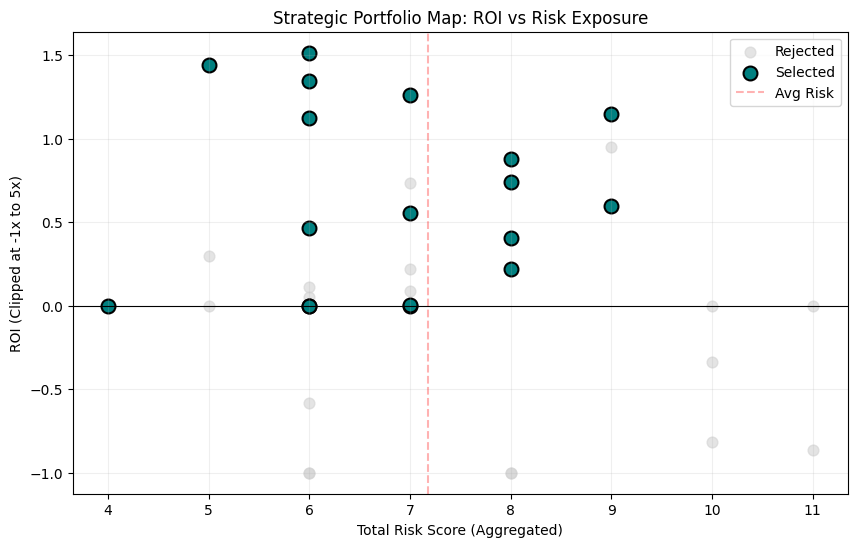

In [16]:
import matplotlib.pyplot as plt

# Prepare data from analysis
df_plot = df_masterproject.copy()

# Sync with latest selected projects
selected_ids = df_baseline_flex['ProjectID'].tolist()
df_plot['Selected'] = df_plot['ProjectID'].isin(selected_ids)

df_plot['TotalRisk'] = (
    df_plot['ExecutionRisk'] + df_plot['ScalabilityRisk'] + 
    df_plot['TimeSensitivityRisk'] + df_plot['DependencyRisk']
)

# ROI Calculation with clipping to avoid outlier distortion in the plot
df_plot['ROI_Display'] = (
    (df_plot['RevenuesLikely'] - (df_plot['TotalNewOpsCost'] + df_plot['TotalNewJobsCost'])) / 
    (df_plot['MatBudgetLikely'] + df_plot['HumBudgetLikely'] + 1e-6)
).clip(lower=-1, upper=5)

# Plotting
plt.figure(figsize=(10, 6))

# Non-selected projects
plt.scatter(
    df_plot[~df_plot['Selected']]['TotalRisk'], 
    df_plot[~df_plot['Selected']]['ROI_Display'], 
    c='lightgrey', alpha=0.6, label='Rejected', s=60
)

# Selected projects
plt.scatter(
    df_plot[df_plot['Selected']]['TotalRisk'], 
    df_plot[df_plot['Selected']]['ROI_Display'], 
    c='teal', edgecolors='black', label='Selected', s=100, linewidth=1.5
)

# Add thresholds or mean lines for context
plt.axvline(x=df_plot['TotalRisk'].mean(), color='red', linestyle='--', alpha=0.3, label='Avg Risk')
plt.axhline(y=0, color='black', linewidth=0.8)

plt.xlabel("Total Risk Score (Aggregated)")
plt.ylabel("ROI (Clipped at -1x to 5x)")
plt.title("Strategic Portfolio Map: ROI vs Risk Exposure")
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()

## 2.6-Strategic Stress-Testing & Portfolio Resilience Analysis

| Scenario                     | Projects Selected | Total Investment ($)| Budget Utilization | Avg ROI | Strategic Posture               |
|-------------------------------|-----------------|-----------------|------------------|---------|--------------------------------|
| Baseline (Reference)          | 18              | 896,754        | 89.7%            | 0.65x   | Balanced & Prudent             |
| 1. Austerity (-40% Budget)    | 13              | 359,049        | 35.9%            | 0.38x   | Core Survival (Over-reaction)  |
| 2. War for Talent (-50% HR)   | 16              | 946,074        | 94.6%            | 0.61x   | Operational Agility            |
| 3. Inflation (+20% Costs)     | 18              | 945,663        | 94.6%            | 0.55x   | Financial Robustness           |
| 4. Aggressive Growth          | 18              | 896,754        | 89.7%            | 0.65x   | Strategic Rigidity             |


- **Financial vs. Human Sensitivity**: The portfolio is highly sensitive to budget cuts but remarkably resilient to human resource shortages. The model successfully reallocates capital to less labor-intensive projects when key roles are unavailable.

- **Contingency Validation**: The recommended 16.4% risk reserve proved its value, allowing the portfolio to maintain its full project scope even under a +20% inflationary shock.

- **Structural Conservatism**: The "Strategic Bucketing" logic (±5% tolerance) ensures consistency but creates a "ceiling" for growth. In austerity or aggressive growth modes, these constraints may need to be relaxed to allow for better capital deployment.

While it would have been possible to test various weightings for our strategic buckets or to loosen our selection criteria, our objective here is not the pursuit of maximum ROI, but rather the definition of the most balanced portfolio that perfectly meets long-term organizational needs.

## 2.7-Portfolio Stochastic Simulation

This section extends the deterministic stress-testing framework by introducing stochastic simulation at the portfolio level. While strategic stress tests evaluate predefined adverse scenarios, the Monte Carlo approach captures uncertainty propagation, correlation effects, and tail risk across the entire portfolio.

The objective is not to re-optimize project selection, but to assess the robustness of the optimized portfolio under a wide range of plausible states of the world.
This enables risk-adjusted decision-making beyond point estimates.

In [17]:
from optimization.monte_carlo_analysis import monte_carlo_portfolio, monte_carlo_portfolio_tracking
monte_carlo_portfolio(df_baseline_flex, n_simulations = 10000, budget_limit = 1000000)

=========== MONTE CARLO PORTFOLIO RESULTS ===========
Probability of Portfolio Failure : 14.5%
Average Projects Delivered       : 15.8
P10 Delivered Projects           : 14
P90 Delivered Projects           : 18


Monte Carlo simulations indicate a 14.5 % probability of portfolio failure under adverse but plausible conditions.
In 90 % of scenarios, at least 14 projects are successfully delivered, with an average delivery rate of 88 %.
These results confirm that the optimized portfolio is robust but not risk-free, justifying the previously recommended contingency reserve.

In [18]:
monte_carlo_portfolio_tracking(df_baseline_flex, n_sim = 10000)

    FailureRate  DeliveryRate
31       0.2276        0.7724
28       0.2270        0.7730
17       0.2267        0.7733
40       0.1818        0.8182
26       0.1805        0.8195
25       0.1789        0.8211
34       0.1777        0.8223
2        0.1760        0.8240
35       0.1743        0.8257
38       0.1272        0.8728

=========== MONTE CARLO PORTFOLIO RESULTS ===========
Portfolio Failure Probability (%)  : 93.67
Average Projects Delivered         : 15.12
P10 Delivered Projects             : 13.00
P90 Delivered Projects             : 17.00


Monte Carlo simulation reveals that portfolio risk is driven by cumulative execution uncertainty rather than single-point failure. While the probability of at least one project underperforming is high (≈94%), the average number of delivered projects remains stable at ~15 out of 18.

Risk concentration is limited to a small subset of initiatives (specifically projects 31, 28, and 17) exhibiting elevated failure probabilities (≈18–23%), which should be considered execution-critical. The portfolio therefore demonstrates acceptable robustness, provided that partial non-delivery is explicitly anticipated and managed.

## 2.8-Summary - Notebook 2

| Area                     | Description |
|---------------------------|-------------|
| Data Integration          | Consolidation of 12 distinct modules, including resource capacity, project profiles, and multi-year demand (2026-2028). |
| Dual-Track Evaluation     | Separate scoring logic: Asset Impact (risk reduction) for maintenance projects vs. Strategic Impact (ROI/Growth) for new initiatives. |
| Operational Bottlenecks   | Identification of "Critical Roles" (e.g., Associate Clinical Director) operating at >90% capacity, defining the real boundaries of execution. |
| Budget Gap Analysis       | Quantifying the 2.2M funding gap between project demand (3.2M) and the available $1M threshold. |
| Linear Programming (LP)   | Deployment of the PuLP solver to select the optimal project mix under budget, human resource, and strategic bucket constraints. |
| Dynamic Phasing           | Transition from static selection to temporal scheduling, unlocking 25 projects by shifting starts to 2027 to level resource load. |
| Stochastic Risk Modeling  | Calculation of a 16.4% Dynamic Contingency Fund (174k) based on individual project execution and complexity risks. |
| Resilience Stress-Testing | Evaluation of portfolio stability across four "What-if" scenarios: Austerity, Talent Crisis, Inflation, and Aggressive Growth. |
| Portfolio Monte Carlo Simulation | Portfolio-level stochastic simulation capturing correlated execution, budget, and capacity shocks to estimate delivery risk, expected number of projects delivered, and tail outcomes under thousands of plausible states of the world. |


## 2.9-Limitations

| Category | Limitation | Description & Implications |
|---------|------------|----------------------------|
| **Data Assumptions** | Synthetic and normalized data | The model relies on synthetic or pre-scaled data, which may not fully capture real-world volatility, behavioral biases, or reporting inconsistencies. Results should therefore be interpreted as structural insights rather than exact forecasts. |
| **Risk Modeling** | Simplified risk aggregation | Risk dimensions are aggregated linearly or multiplicatively, which may underrepresent non-linear effects, cascading failures, or extreme tail risks present in complex organizations. |
| **Deterministic Optimization Core** | Limited endogenous uncertainty | Core optimization stages are deterministic. Although stochastic simulations are applied ex post, uncertainty is not fully embedded within the optimization loop itself (e.g., no stochastic or robust optimization). |
| **Human Behavior** | No behavioral or political dynamics | The model assumes rational execution and compliance. Informal power dynamics, resistance to change, learning curves, and morale effects are not explicitly modeled. |
| **Strategic Bucketing** | Structural rigidity of allocation constraints | Strategic budget buckets (even with ±5% tolerance) impose artificial ceilings and floors that may restrict emergent or opportunistic strategies in extreme conditions. |
| **ROI Measurement** | Narrow financial ROI definition | ROI focuses on quantifiable financial returns and costs, potentially undervaluing intangible benefits such as reputation, knowledge accumulation, cultural change, or strategic option value. |
| **Temporal Resolution** | Discrete yearly phasing | Project phasing is modeled at an annual level, which may obscure intra-year peaks, short-term bottlenecks, or sequencing effects that occur at finer time scales. |
| **Interdependencies** | Limited cross-project synergies | While prerequisites are modeled, positive synergies and negative interference effects between concurrent projects are only partially captured. |
| **Scalability** | Computational and data complexity | As the number of projects, roles, and time periods increases, model complexity and solve time may grow non-linearly, limiting real-time or enterprise-wide deployment without simplification. |
| **Decision Ownership** | Model does not replace governance | The framework supports decision-making but does not arbitrate strategic intent. Executive judgment is still required to validate trade-offs, override constraints, and accept non-financial outcomes. |
